In [6]:
%matplotlib inline

from hermes.objects import Earth, Satellite
from hermes.propagation import secular_rates_J2
from astropy import time, units as u
import matplotlib.pyplot as plt

figures_dir = 'D:/git/thesis_report_ae/figures'

import numpy as np
from notebooks.PlotUtil import apply_report_formatting

rp = 6678 * u.km
ra = 9440 * u.km
raan = 45 * u.deg
inc = 28 * u.deg
argp = 30 * u.deg
nu = 40 * u.deg

a = (rp + ra) / 2
e = (ra - rp) / (ra + rp)

sat1 = Satellite.from_classical(Earth.poli_body,
                                a,
                                e,
                                inc,
                                raan,
                                argp,
                                nu)

tof = np.arange(0, 48) * u.h
tof_s = tof.to(u.s).value

draan, dargp, dnu = secular_rates_J2(sat1.attractor.k.to(u.m ** 3 / u.s ** 2).value,
                                        sat1.p.to(u.m).value,
                                        sat1.ecc.value,
                                        sat1.inc.to(u.rad).value,
                                        sat1.raan.to(u.rad).value,
                                        sat1.argp.to(u.rad).value,
                                        sat1.nu.to(u.rad).value,
                                        sat1.attractor.J2.value,
                                        sat1.attractor.R_mean.to(u.m).value)

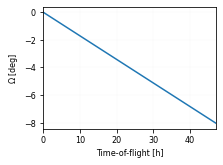

In [7]:
fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

ax.plot(tof, tof_s * draan * 180. / np.pi)
ax.set_xlim((0, np.max(tof.value)))
ax.set_xlabel('Time-of-flight [h]')
ax.set_ylabel('$\Omega$ [deg]')
ax.grid(linestyle=':', linewidth = 0.1)
apply_report_formatting()

plt.savefig(figures_dir + '/J2_raan.pdf')
plt.show()


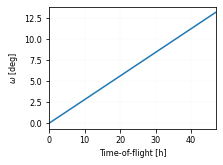

In [8]:
fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

ax.plot(tof, tof_s * dargp * 180. / np.pi)
ax.set_xlim((0, np.max(tof.value)))
ax.set_xlabel('Time-of-flight [h]')
ax.set_ylabel('$\omega$ [deg]')
ax.grid(linestyle=':', linewidth = 0.1)
apply_report_formatting()

plt.savefig(figures_dir + '/J2_argp.pdf')
plt.show()


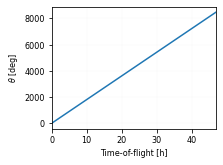

In [9]:
fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

ax.plot(tof, tof_s * dnu * 180. / np.pi)
ax.set_xlim((0, np.max(tof.value)))
ax.set_xlabel('Time-of-flight [h]')
ax.set_ylabel('$\\theta$ [deg]')
ax.grid(linestyle=':', linewidth = 0.1)
apply_report_formatting()

plt.savefig(figures_dir + '/J2_true_anomaly.pdf')
plt.show()